In [ ]:
!pip install huggingface_hub

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from datasets import load_dataset

In [ ]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("dongx1997/NutriBench", "v2")

In [4]:
ds

DatasetDict({
    train: Dataset({
        features: ['meal_description', 'carb', 'fat', 'energy', 'protein', 'country', 'serving_type'],
        num_rows: 15617
    })
})

In [5]:
ds['train']

Dataset({
    features: ['meal_description', 'carb', 'fat', 'energy', 'protein', 'country', 'serving_type'],
    num_rows: 15617
})

In [6]:
ds['train']['meal_description'][10]

'So, my lunch includes 72g of maize flour, 17g of okra leaves, 5g of onion, 16g of tomato, and 85g of mango.'

In [7]:
ds['train']['carb'][10]

74.1

In [8]:
ds['train']['fat'][10]

1.7000000000000002

In [9]:
ds['train']['energy'][10]

336.0

In [10]:
ds['train']['protein'][10]

6.6

In [11]:
ds['train']['country'][10]

'ZMB'

In [12]:
ds['train']['serving_type'][10]

'metric'

In [13]:
import pandas as pd
pd.DataFrame(ds['train'])

,meal_description,carb,fat,energy,protein,country,serving_type
0,"For breakfast, I ate a plain bun weighing 126 ...",90.80,4.20,439.00,9.60,ZMB,metric
1,"For lunch, I had 171 grams of boiled fresh gro...",97.80,37.80,806.00,27.90,ZMB,metric
2,"I’ve got 9 grams of boiled kasepa fish, 34 gra...",51.20,14.20,363.00,8.70,ZMB,metric
3,I had a breakfast consisting of 51g of raw whi...,163.80,8.90,792.00,19.00,ZMB,metric
4,"For dinner, I had 105g of raw maize flour alon...",81.10,4.60,390.00,8.40,ZMB,metric
...,...,...,...,...,...,...,...
15612,"For dinner, I'm having a cup of prepared noodl...",40.79,12.52,299.56,6.28,USA,natural
15613,I'm snacking on a cup of banana chips.,42.05,24.19,373.68,1.66,USA,natural
15614,I’ve got a piece of chewing gum along with a 6...,7.89,0.01,29.19,0.00,USA,natural
15615,"For breakfast, I'm having a McDonald's sandwic...",39.68,27.69,523.20,27.47,USA,natural


In [14]:
df_train = pd.DataFrame(ds['train'])

In [15]:
numeric_features = ['carb', 'fat', 'energy', 'protein']

df_train[numeric_features].describe()


,carb,fat,energy,protein
count,15617.000000,15617.000000,15617.000000,15617.000000
mean,52.321347,14.796468,396.003725,13.863180
std,44.046533,15.770686,311.221795,14.320597
min,0.000000,0.000000,0.000000,0.000000
25%,23.260000,4.060000,182.000000,3.600000
50%,43.360000,10.380000,329.320000,10.170000
75%,69.930000,20.640000,524.080000,19.200000
max,1289.300000,218.500000,6641.000000,191.300000


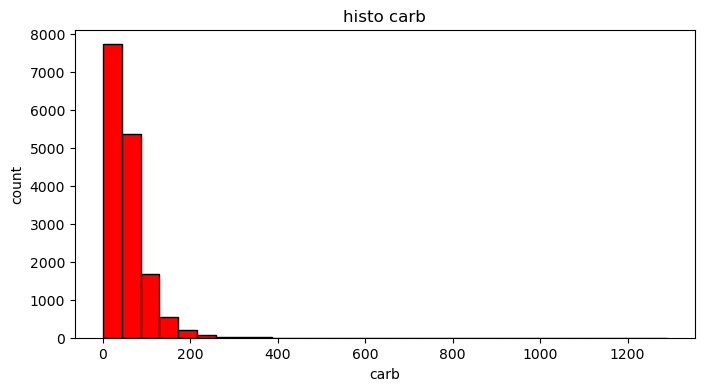

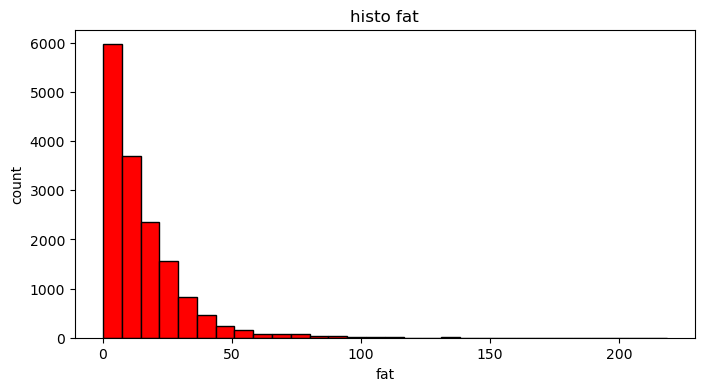

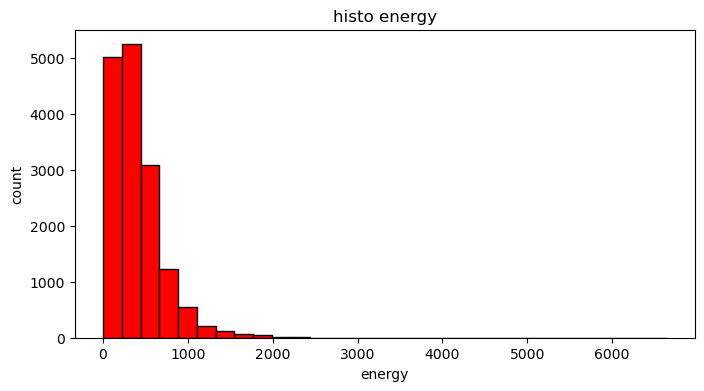

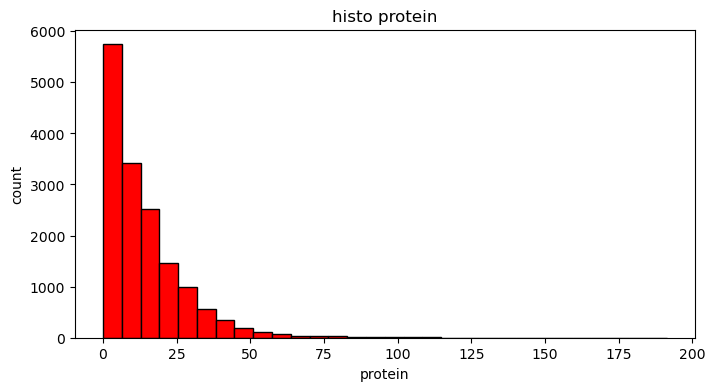

In [16]:
import matplotlib.pyplot as plt

for col in numeric_features:
    plt.figure(figsize=(8,4))
    plt.hist(df_train[col], bins=30, color='red', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title(f'histo {col}')
    plt.show()


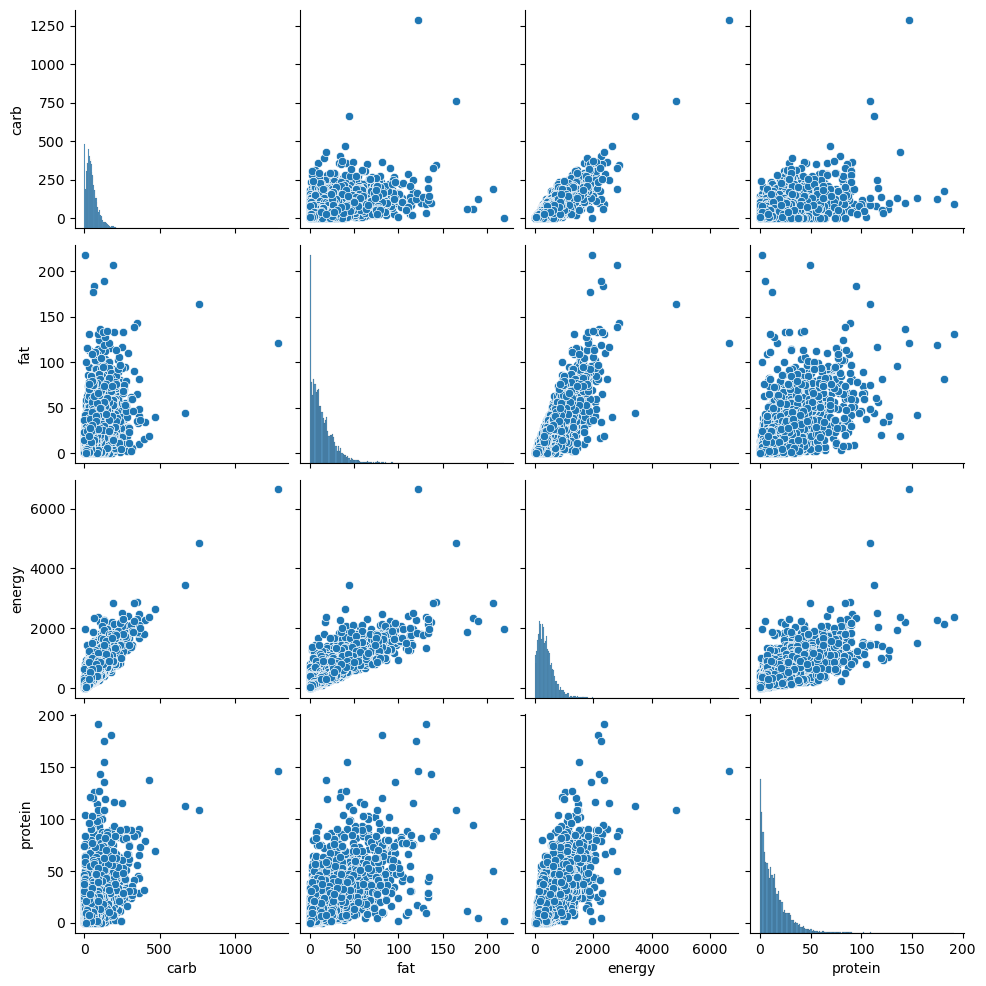

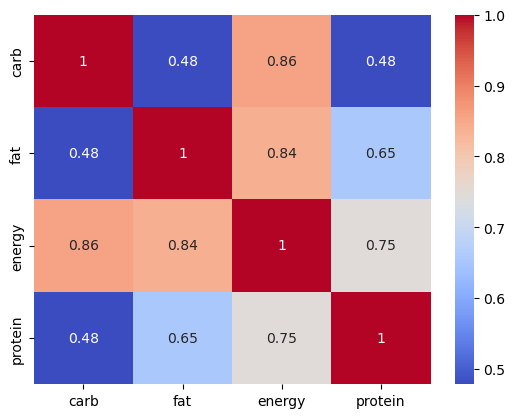

In [17]:
import seaborn as sns

sns.pairplot(df_train[numeric_features])
plt.show()

sns.heatmap(df_train[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.show()


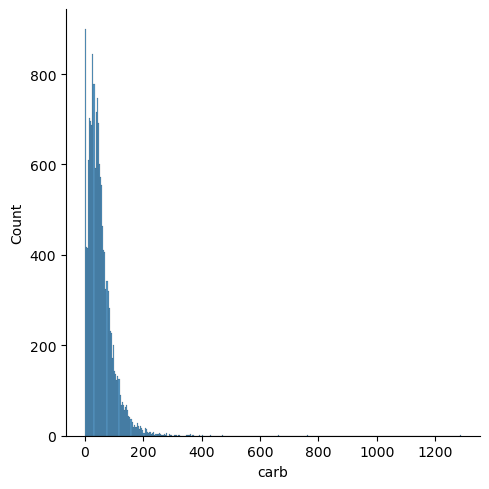

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['carb', 'fat', 'energy', 'protein']

sns.displot(df_train['carb'])

In [19]:
df_train.isna()

,meal_description,carb,fat,energy,protein,country,serving_type
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
15612,False,False,False,False,False,False,False
15613,False,False,False,False,False,False,False
15614,False,False,False,False,False,False,False
15615,False,False,False,False,False,False,False


In [20]:
df_train.isnull()

,meal_description,carb,fat,energy,protein,country,serving_type
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
15612,False,False,False,False,False,False,False
15613,False,False,False,False,False,False,False
15614,False,False,False,False,False,False,False
15615,False,False,False,False,False,False,False


In [21]:
df_train

,meal_description,carb,fat,energy,protein,country,serving_type
0,"For breakfast, I ate a plain bun weighing 126 ...",90.80,4.20,439.00,9.60,ZMB,metric
1,"For lunch, I had 171 grams of boiled fresh gro...",97.80,37.80,806.00,27.90,ZMB,metric
2,"I’ve got 9 grams of boiled kasepa fish, 34 gra...",51.20,14.20,363.00,8.70,ZMB,metric
3,I had a breakfast consisting of 51g of raw whi...,163.80,8.90,792.00,19.00,ZMB,metric
4,"For dinner, I had 105g of raw maize flour alon...",81.10,4.60,390.00,8.40,ZMB,metric
...,...,...,...,...,...,...,...
15612,"For dinner, I'm having a cup of prepared noodl...",40.79,12.52,299.56,6.28,USA,natural
15613,I'm snacking on a cup of banana chips.,42.05,24.19,373.68,1.66,USA,natural
15614,I’ve got a piece of chewing gum along with a 6...,7.89,0.01,29.19,0.00,USA,natural
15615,"For breakfast, I'm having a McDonald's sandwic...",39.68,27.69,523.20,27.47,USA,natural


In [22]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['carb', 'fat', 'energy', 'protein']

scaler = StandardScaler()
df_train_scaled = df_train.copy()  
df_train_scaled[numeric_features] = scaler.fit_transform(df_train[numeric_features])


df_train_scaled.head()


,meal_description,carb,fat,energy,protein,country,serving_type
0,"For breakfast, I ate a plain bun weighing 126 ...",0.873619,-0.671931,0.138158,-0.297705,ZMB,metric
1,"For lunch, I had 171 grams of boiled fresh gro...",1.032547,1.458673,1.317419,0.980215,ZMB,metric
2,"I’ve got 9 grams of boiled kasepa fish, 34 gra...",-0.025459,-0.037823,-0.106049,-0.360554,ZMB,metric
3,I had a breakfast consisting of 51g of raw whi...,2.531010,-0.373900,1.272433,0.358713,ZMB,metric
4,"For dinner, I had 105g of raw maize flour alon...",0.653390,-0.646566,-0.019291,-0.381503,ZMB,metric


In [23]:
from sklearn.preprocessing import MinMaxScaler

numeric_features = ['carb', 'fat', 'energy', 'protein']

scaler = MinMaxScaler()
df_train_minmax = df_train.copy() 
df_train_minmax[numeric_features] = scaler.fit_transform(df_train[numeric_features])

df_train_minmax.head()


,meal_description,carb,fat,energy,protein,country,serving_type
0,"For breakfast, I ate a plain bun weighing 126 ...",0.070426,0.019222,0.066105,0.050183,ZMB,metric
1,"For lunch, I had 171 grams of boiled fresh gro...",0.075855,0.172998,0.121367,0.145844,ZMB,metric
2,"I’ve got 9 grams of boiled kasepa fish, 34 gra...",0.039711,0.064989,0.054660,0.045478,ZMB,metric
3,I had a breakfast consisting of 51g of raw whi...,0.127046,0.040732,0.119259,0.099320,ZMB,metric
4,"For dinner, I had 105g of raw maize flour alon...",0.062902,0.021053,0.058726,0.043910,ZMB,metric


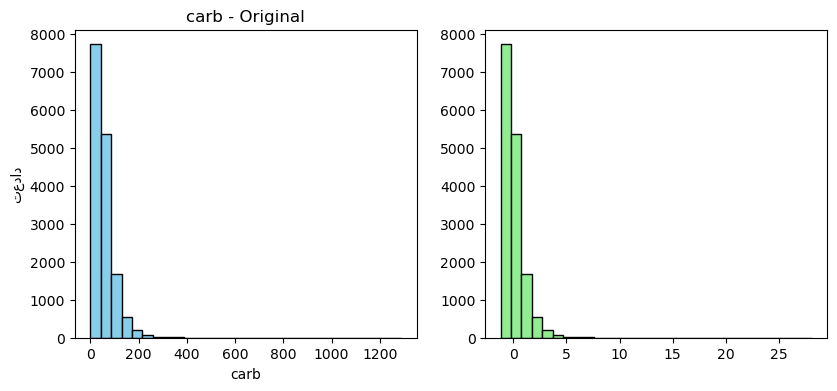

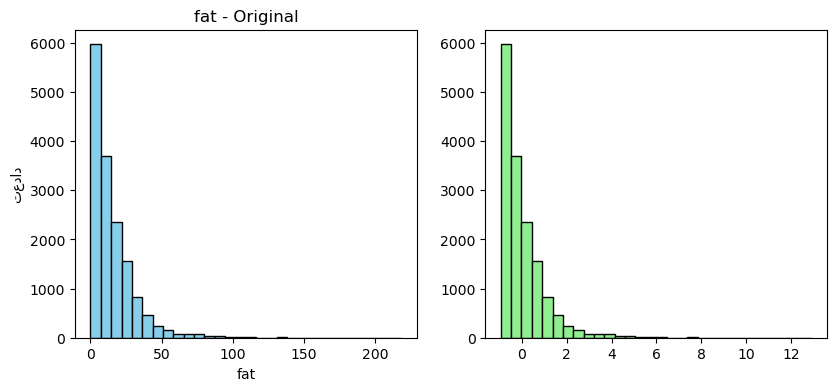

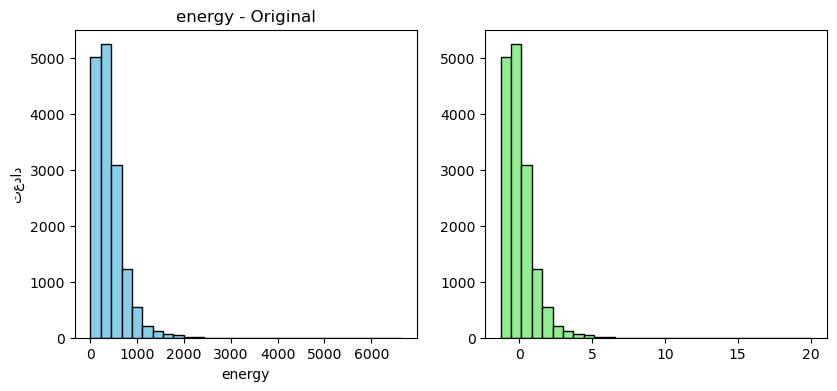

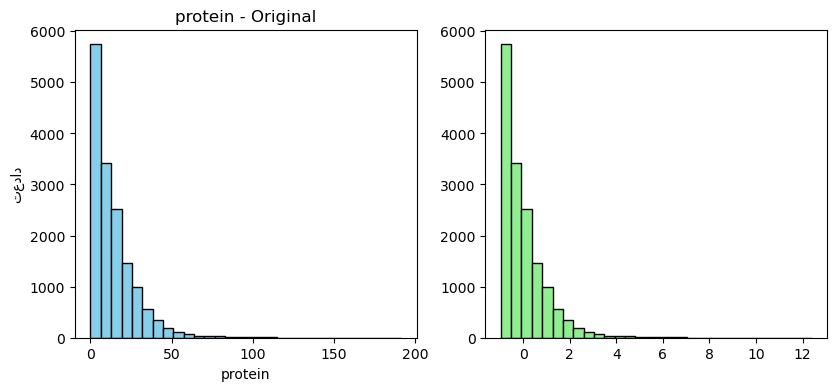

In [24]:
import matplotlib.pyplot as plt

numeric_features = ['carb', 'fat', 'energy', 'protein']

df_original = df_train[numeric_features]

from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
df_standard = df_original.copy()
df_standard[numeric_features] = scaler_std.fit_transform(df_original)

from sklearn.preprocessing import MinMaxScaler
scaler_mm = MinMaxScaler()
df_minmax = df_original.copy()
df_minmax[numeric_features] = scaler_mm.fit_transform(df_original)

for col in numeric_features:
    plt.figure(figsize=(15,4))

    plt.subplot(1,3,1)
    plt.hist(df_original[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{col} - Original')
    plt.xlabel(col)
    plt.ylabel('تعداد')

    # Standard Scaled
    plt.subplot(1,3,2)
    plt.hist(df_standard[col], bins=30, color='lightgreen', edgecolor='black')


Rows used: 15617

Basic descriptive stats (original):
               mean         std  min     max
carb      52.321347   44.046533  0.0  1289.3
fat       14.796468   15.770686  0.0   218.5
energy   396.003725  311.221795  0.0  6641.0
protein   13.863180   14.320597  0.0   191.3

Skewness (before):
carb       3.532830
fat        2.679944
energy     2.482545
protein    2.486643
dtype: float64

Kurtosis (before):
carb       51.808262
fat        13.725689
energy     18.724658
protein    11.946331
dtype: float64

Descriptive stats (after QuantileTransformer + StandardScaler):
                 mean       std       min       max
carb    -7.279685e-18  1.000032 -4.564570  4.600751
fat      7.279685e-18  1.000032 -4.066510  4.183330
energy  -1.455937e-17  1.000032 -5.079924  5.065977
protein  7.279685e-18  1.000032 -4.146466  4.262083

Skewness (after):
carb      -1.102215
fat       -1.545036
energy    -0.304177
protein   -1.522872
dtype: float64

Kurtosis (after):
carb       4.551671
fat      

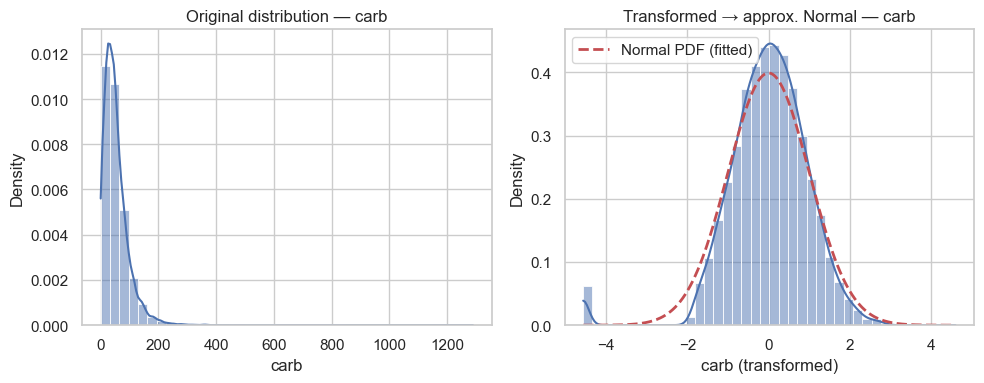

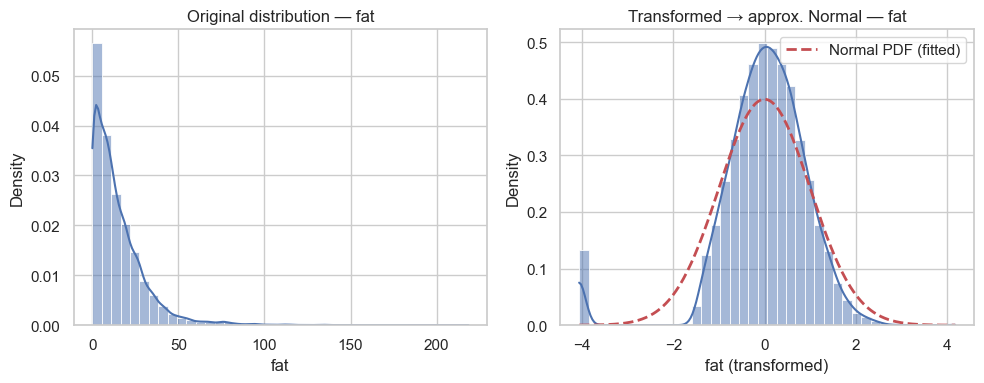

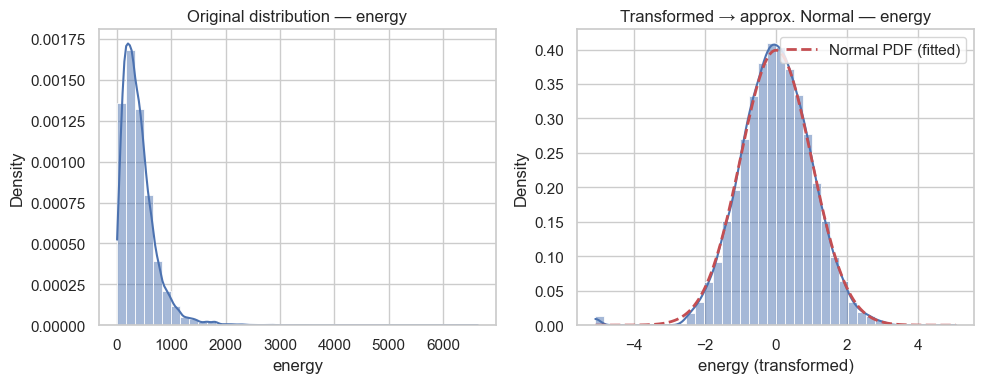

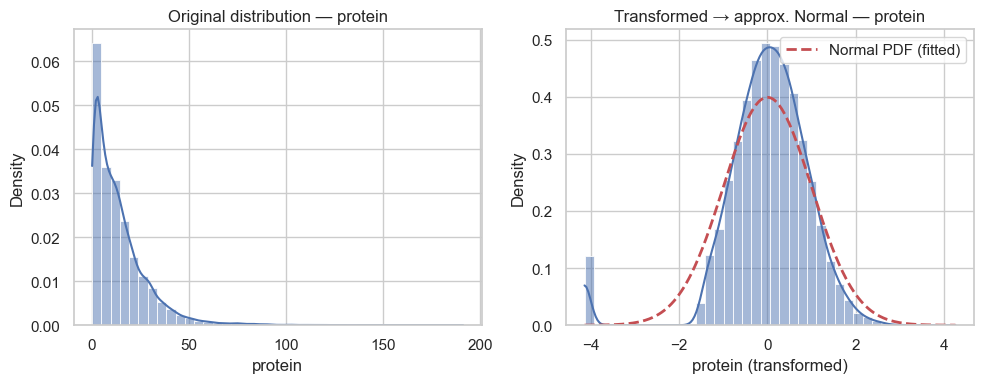

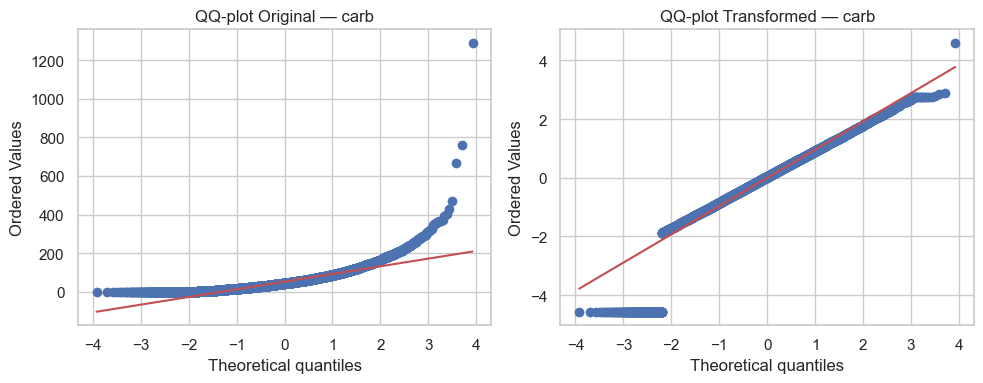

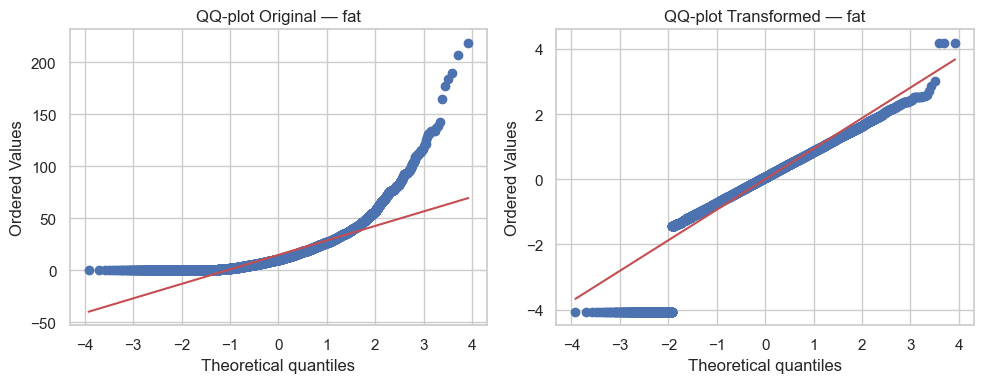

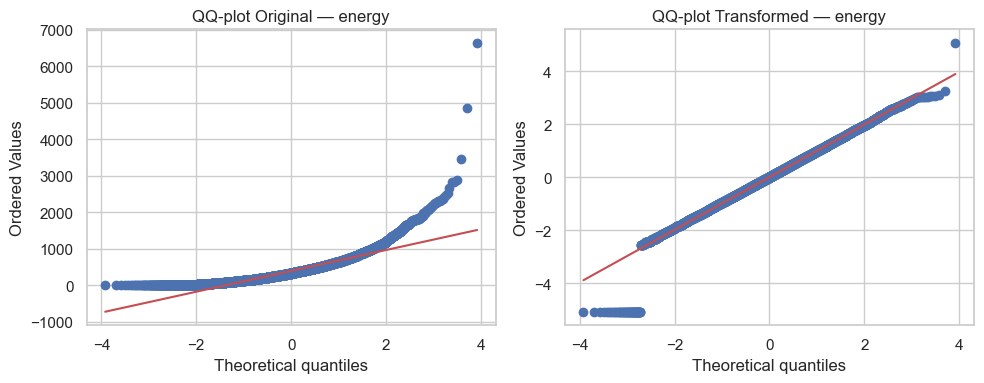

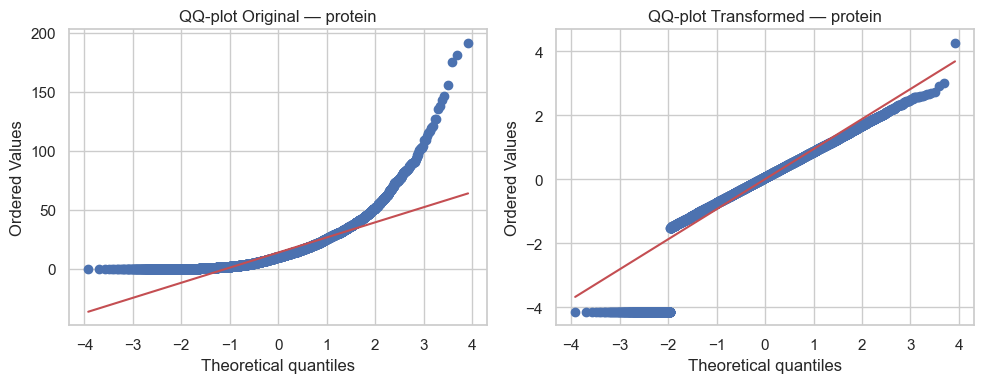

In [32]:
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.pipeline import make_pipeline
numeric_cols = ['carb', 'fat', 'energy', 'protein']
data = df[numeric_cols].copy().dropna().reset_index(drop=True)

print("Rows used:", len(data))
print("\nBasic descriptive stats (original):")
print(data.describe().T[['mean','std','min','max']])

# 3) Compute skew/kurtosis before transform
skew_before = data.skew()
kurt_before = data.kurtosis()
print("\nSkewness (before):")
print(skew_before)
print("\nKurtosis (before):")
print(kurt_before)

# 4) Build transformer: QuantileTransformer -> StandardScaler
# - n_quantiles: set to min(1000, n_samples) (default in sklearn is 1000)
# - output_distribution='normal': map empirical quantiles to normal quantiles
n_samples = data.shape[0]
n_q = min(1000, n_samples)
qt = QuantileTransformer(n_quantiles=n_q, output_distribution='normal', random_state=0)
scaler = StandardScaler()
pipe = make_pipeline(qt, scaler)

# Fit-transform numeric columns (returns numpy array)
transformed_arr = pipe.fit_transform(data.values)
transformed = pd.DataFrame(transformed_arr, columns=numeric_cols)

# 5) Descriptives after transform
print("\nDescriptive stats (after QuantileTransformer + StandardScaler):")
print(transformed.describe().T[['mean','std','min','max']])

skew_after = transformed.skew()
kurt_after = transformed.kurtosis()
print("\nSkewness (after):")
print(skew_after)
print("\nKurtosis (after):")
print(kurt_after)

# 6) Plot: for each column show before vs after (hist + KDE). Overlay normal PDF on transformed.
for col in numeric_cols:
    plt.figure(figsize=(10,4))
    # Left: original
    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True, stat="density", bins=40)
    plt.title(f"Original distribution — {col}")
    plt.xlabel(col)
    plt.ylabel("Density")

    # Right: transformed
    plt.subplot(1,2,2)
    sns.histplot(transformed[col], kde=True, stat="density", bins=40)
    # overlay theoretical normal using empirical mean/std of transformed data
    mu, sigma = transformed[col].mean(), transformed[col].std()
    x = np.linspace(transformed[col].min(), transformed[col].max(), 300)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r--', lw=2, label='Normal PDF (fitted)')
    plt.title(f"Transformed → approx. Normal — {col}")
    plt.xlabel(f"{col} (transformed)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# 7) Optional: show QQ-plots (before and after) to visually inspect normality
import matplotlib.pyplot as plt
for col in numeric_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    stats.probplot(data[col].dropna(), dist="norm", plot=plt)
    plt.title(f"QQ-plot Original — {col}")

    plt.subplot(1,2,2)
    stats.probplot(transformed[col].dropna(), dist="norm", plot=plt)
    plt.title(f"QQ-plot Transformed — {col}")

    plt.tight_layout()
    plt.show()

# 8) Note about statistical normality testing (optional):
# For very large n, tests like Shapiro-Wilk are extremely sensitive (they often reject normality).
# Visual checks (hist+KDE, QQ plot) and skew/kurtosis numbers are usually more informative.


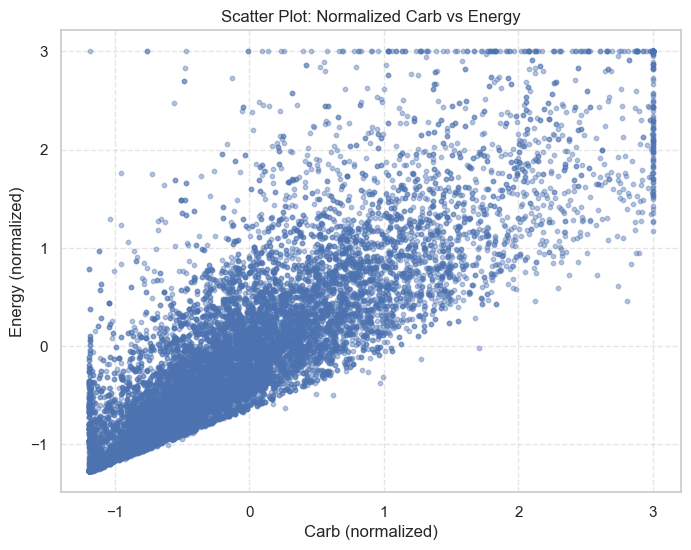

In [33]:

# Normalize data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)
normalized_data = np.clip(normalized_data, -3, 3)  # Limit to make plot readable

# Convert to dataframe for easy plotting
data_norm = data.copy()
data_norm[numeric_features] = normalized_data

# Scatter plot between two features (e.g., carb vs energy)
plt.figure(figsize=(8,6))
plt.scatter(data_norm['carb'], data_norm['energy'], alpha=0.4, s=10)
plt.title("Scatter Plot: Normalized Carb vs Energy")
plt.xlabel("Carb (normalized)")
plt.ylabel("Energy (normalized)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()